In [128]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr

In [43]:
#import data
reddit_data = pd.read_csv('one-million-reddit-questions.csv')
reddit_data.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,pyw2qk,2qh1i,askreddit,False,1633046381,https://old.reddit.com/r/AskReddit/comments/py...,self.askreddit,https://www.reddit.com/r/AskReddit/comments/py...,NaN,What's the ugliest word in the English language?,1
1,post,pyw2jx,2qh1i,askreddit,False,1633046362,https://old.reddit.com/r/AskReddit/comments/py...,self.askreddit,https://www.reddit.com/r/AskReddit/comments/py...,NaN,If you could bring one celebrity back from the...,1
2,post,pyw26r,2qh1i,askreddit,False,1633046327,https://old.reddit.com/r/AskReddit/comments/py...,self.askreddit,https://www.reddit.com/r/AskReddit/comments/py...,NaN,The year is 2022. We’ve now discover how time ...,7
3,post,pyw26m,2qh1i,askreddit,False,1633046327,https://old.reddit.com/r/AskReddit/comments/py...,self.askreddit,NaN,[removed],What's your unpopular opinions?,1
4,post,pyw269,2qh1i,askreddit,False,1633046326,https://old.reddit.com/r/AskReddit/comments/py...,self.askreddit,NaN,[removed],Celebrities with the biggest ego?,1


In [44]:
#Info of the dataset
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   type            1000000 non-null  object
 1   id              1000000 non-null  object
 2   subreddit.id    1000000 non-null  object
 3   subreddit.name  1000000 non-null  object
 4   subreddit.nsfw  1000000 non-null  bool  
 5   created_utc     1000000 non-null  int64 
 6   permalink       1000000 non-null  object
 7   domain          1000000 non-null  object
 8   url             517718 non-null   object
 9   selftext        482282 non-null   object
 10  title           1000000 non-null  object
 11  score           1000000 non-null  int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 84.9+ MB


In [45]:
#deleting records that are removed or deleted
reddit_data = reddit_data[reddit_data['selftext']!= '[removed]']
reddit_data = reddit_data[reddit_data['selftext']!= '[deleted]']
reddit_data.shape

(517719, 12)

In [46]:
reddit_data.describe()

,created_utc,score
count,5.177190e+05,517719.000000
mean,1.629112e+09,34.342172
std,2.196694e+06,1008.887850
min,1.625304e+09,0.000000
25%,1.627241e+09,1.000000
50%,1.629065e+09,2.000000
75%,1.630966e+09,3.000000
max,1.633046e+09,89491.000000


Hence, the highest score of the question is 89491 and the lowest is 0. 

## Hypothesis:
### 1. Can a good question depend on number of words asked?
### 2. A reddit ask can have multiple sub questions. An ask having multiple questions affect the score?

In [47]:
def get_word_count(sentence):
    word_list = sentence.split(' ')
    word_count = len(word_list)
    return word_count

In [48]:
reddit_data['noOfWords'] = reddit_data['title'].map(get_word_count)

In [49]:
reddit_data.describe()

,created_utc,score,noOfWords
count,5.177190e+05,517719.000000,517719.000000
mean,1.629112e+09,34.342172,12.988011
std,2.196694e+06,1008.887850,6.479258
min,1.625304e+09,0.000000,1.000000
25%,1.627241e+09,1.000000,9.000000
50%,1.629065e+09,2.000000,12.000000
75%,1.630966e+09,3.000000,16.000000
max,1.633046e+09,89491.000000,68.000000


In [50]:
reddit_data['title'][1]

'If you could bring one celebrity back from the dead who would it be and why?'

In [51]:
reddit_data['score'].head()

0    1
1    1
2    7
5    1
6    1
Name: score, dtype: int64

In [52]:
reddit_data['noOfWords'].head()

0     8
1    16
2    32
5    10
6    15
Name: noOfWords, dtype: int64

In [53]:
reddit_data.describe()

,created_utc,score,noOfWords
count,5.177190e+05,517719.000000,517719.000000
mean,1.629112e+09,34.342172,12.988011
std,2.196694e+06,1008.887850,6.479258
min,1.625304e+09,0.000000,1.000000
25%,1.627241e+09,1.000000,9.000000
50%,1.629065e+09,2.000000,12.000000
75%,1.630966e+09,3.000000,16.000000
max,1.633046e+09,89491.000000,68.000000


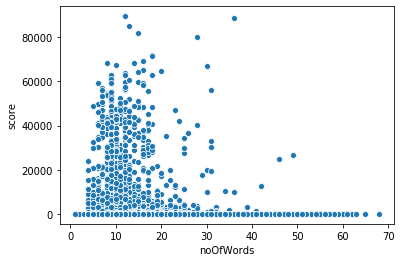

In [54]:
sns.scatterplot(data = reddit_data, x = "noOfWords", y = "score")
plt.show()

In [55]:
corr, _ = pearsonr(reddit_data['noOfWords'], reddit_data['score'])
print(corr)

-0.0039167037304261515


### The variables are negatively correlated to each other. As the number of increases, the score decreases. 

### We can also see from the graph that the score is high for the questions that have 5 to 25 words. 

In [121]:
def get_question_count(lines):
    num_q = lines.split('?')
    if '' in num_q:
        num_q.remove('')
    return len(num_q)

In [125]:
reddit_data['noOfQuestions'] = reddit_data['title'].map(get_question_count)
reddit_data.describe()

,created_utc,score,noOfWords,noOfQuestions
count,5.177190e+05,517719.000000,517719.000000,517719.000000
mean,1.629112e+09,34.342172,12.988011,1.073316
std,2.196694e+06,1008.887850,6.479258,0.297607
min,1.625304e+09,0.000000,1.000000,1.000000
25%,1.627241e+09,1.000000,9.000000,1.000000
50%,1.629065e+09,2.000000,12.000000,1.000000
75%,1.630966e+09,3.000000,16.000000,1.000000
max,1.633046e+09,89491.000000,68.000000,13.000000


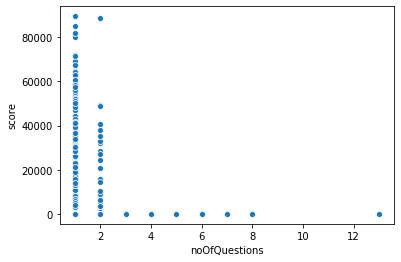

In [124]:
sns.scatterplot(data = reddit_data, x = "noOfQuestions", y = "score")
plt.show()

In [126]:
words_corr, _ = pearsonr(reddit_data['noOfQuestions'], reddit_data['score'])
print(words_corr)

-0.0031653282712431627


### The variables are negatively correlated to each other. As the number of questions increases, the score decreases. 

### We can also see from the graph that the score is high for the questions that have 1 or 2 sub questions. 